<a href="https://colab.research.google.com/github/Faiqulilmi16/Thesis/blob/main/Klasifikasi_Extraversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Regresi Kepribadian

In [ ]:
!pip install PyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=5edadbe791d8b5d261a7387135ec27ff06c4c34e02b8bf41718f04c8fed9806a
  Stored in directory: /root/.cache/pip/wheels/6c/10/da/a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built PyDrive


In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1IcjkBu7jQSKuUzmhC9GM30jgJLJlEvVf'})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip "/content/drive/MyDrive/Datatrain3.zip"

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Datatrain3.zip
   creating: Datatrain3/A/
 extracting: Datatrain3/A/datatrain001.png  
 extracting: Datatrain3/A/datatrain002.png  
  inflating: Datatrain3/A/datatrain003.png  
  inflating: Datatrain3/A/datatrain004.png  
  inflating: Datatrain3/A/datatrain005.png  
  inflating: Datatrain3/A/datatrain006.png  
  inflating: Datatrain3/A/datatrain007.png  
  inflating: Datatrain3/A/datatrain008.png  
 extracting: Datatrain3/A/datatrain009.png  
  inflating: Datatrain3/A/datatrain010.png  
  inflating: Datatrain3/A/datatrain011.png  
  inflating: Datatrain3/A/datatrain012.png  
  inflating: Datatrain3/A/datatrain013.png  
  inflating: Datatrain3/A/datatrain014.png  
  inflating: Datatrain3/A/datatrain015.png  
  inflating: Datatrain3/A/datatrain016.png  
  inflating: Datatrain3/A/datatrain017.png  
  inflating: Datatrain3/A/datatrain018.png  
  inflating: Datatrain3/A/datatrain019.png  
  inflating: Datatrain3/A/datatrain020.png  

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
train_labels = pd.read_csv('/content/Datatrain3/extraversion.csv')
train_labels.head()

,id,labels,Rendah,Sedang,Tinggi
0,datatrain001,"[""Sedang""]",0,1,0
1,datatrain002,"[""Sedang""]",0,1,0
2,datatrain003,"[""Tinggi""]",0,0,1
3,datatrain004,"[""Tinggi""]",0,0,1
4,datatrain005,"[""Tinggi""]",0,0,1


In [ ]:
train_labels.columns

Index(['id', 'labels', 'Rendah', 'Sedang', 'Tinggi'], dtype='object')

In [ ]:
train_image = []
for i in tqdm(range(train_labels.shape[0])):
    img = image.load_img('Datatrain3/Z/'+train_labels['id'][i]+'.png',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 105/105 [00:00<00:00, 680.01it/s]


In [ ]:
X.shape

(105, 200, 200, 3)

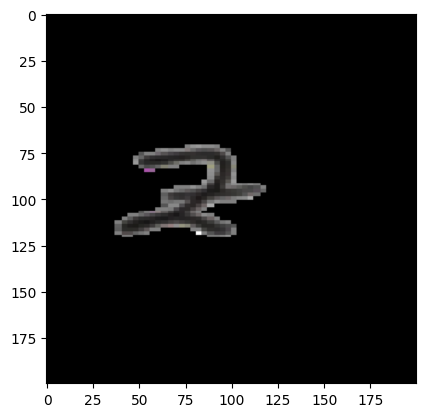

In [ ]:
plt.imshow(X[3])

In [ ]:
y = np.array(train_labels.drop(['id', 'labels'],axis=1))
y.shape

(105, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 700,643 (2.67 MB)

 Trainable params: 700,643 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers

f1_metric = tf.keras.metrics.F1Score(average='macro')

# Use the Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_metric, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [ ]:
from tensorflow.keras.callbacks import Callback

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=2, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=64)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3233 - f1_score: 0.2040 - loss: 1.0891 - precision: 0.3594 - recall: 0.7810 - val_accuracy: 0.5625 - val_f1_score: 0.2400 - val_loss: 0.9093 - val_precision: 0.5758 - val_recall: 0.5938
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6154 - f1_score: 0.3125 - loss: 0.8299 - precision: 0.5618 - recall: 0.8057 - val_accuracy: 0.5625 - val_f1_score: 0.2400 - val_loss: 0.8681 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5659 - f1_score: 0.3156 - loss: 0.8657 - precision: 0.5191 - recall: 0.9048 - val_accuracy: 0.5625 - val_f1_score: 0.2400 - val_loss: 0.9257 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5293 - f1_score: 0.3143 - loss: 0.9096 - precision: 0.5015 - recall: 0.8813 - val_accuracy: 0.5625 - val_f1_score: 0.2400 - val_loss: 0.9486 - val_precision: 0.5000 - val_recall: 1.0000


In [ ]:
img = image.load_img('/content/drive/MyDrive/Datatest/A/datatest18.png',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Tinggi (0.629)


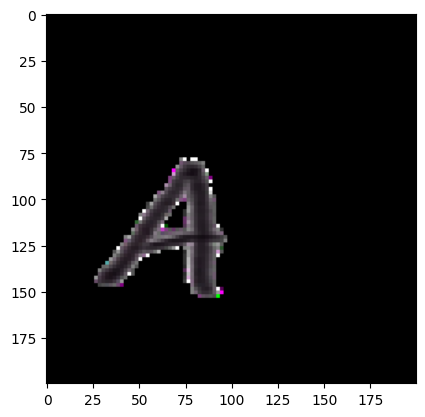

In [ ]:
classes = np.array(train_labels.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_1 = np.argsort(proba[0])[:-2:-1]
for i in range(1):
    print("{}".format(classes[top_1[i]])+" ({:.3})".format(proba[0][top_1[i]]))
plt.imshow(img)